In [1]:
from ljungbox import *
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 16, 8

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 0, 'Lag')

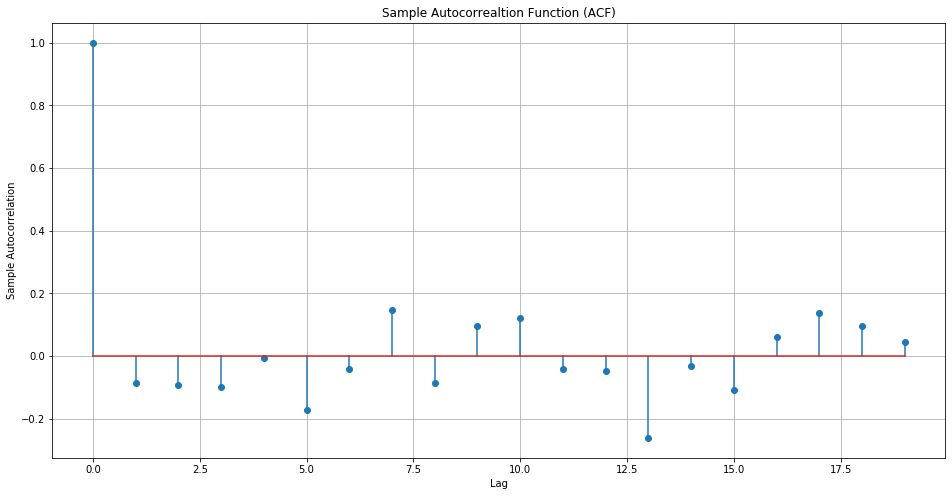

In [3]:
x = np.random.randn(100)
h = 20 # Number of lags
lags = range(h)
sa = np.zeros((h))
for k in range(len(lags)):
    sa[k] = sac(x, k)
plt.figure()
markerline, stemlines, baseline = plt.stem(lags, sa)
plt.grid()
plt.title('Sample Autocorrealtion Function (ACF)')
plt.ylabel('Sample Autocorrelation')
plt.xlabel('Lag')

Null Hypothesis : There is <b> no autocorrelation </b> between the signal and its lagged version  
Alternate Hypothesis : There is <b> significant autocorrelation </b> between the signal and its lagged version

\begin{equation*}
  Q = n(n+2)\sum_{k=1}^{m} \, \frac{\hat{r}^2_k}{n-k} 
\end{equation*}

$ \hat{r}_k $ is the estimated autocorrelation of the series at lag

$$ Q > \chi_{1-\alpha, \, h}^2 $$

where $ \chi_{1-\alpha, \, h}^2 $ is the chi-square distribution table value with h degrees of freedom and significance level $ \alpha $.

In [4]:
h, pV, Q, cV = lbqtest(x, range(1, 20), alpha=0.1)
print ('lag   p-value          Q    c-value   rejectH0')
for i in range(len(h)):
    print ("%-2d %10.3f %10.3f %10.3f      %s" % (i+1, pV[i], Q[i], cV[i], str(h[i])))

lag   p-value          Q    c-value   rejectH0
1       0.377      0.781      2.706      False
2       0.431      1.684      4.605      False
3       0.439      2.705      6.251      False
4       0.608      2.708      7.779      False
5       0.312      5.938      9.236      False
6       0.408      6.136     10.645      False
7       0.288      8.530     12.017      False
8       0.311      9.380     13.362      False
9       0.317     10.430     14.684      False
10      0.278     12.106     15.987      False
11      0.342     12.295     17.275      False
12      0.403     12.545     18.549      False
13      0.082     20.585     19.812      True
14      0.109     20.716     21.064      False
15      0.104     22.144     22.307      False
16      0.126     22.568     23.542      False
17      0.098     24.858     24.769      True
18      0.099     26.015     25.989      True
19      0.123     26.249     27.204      False


In [5]:
file_path = 'eda_ts_data.csv'

In [6]:
ts = pd.read_csv(file_path)
ts["ds"] = pd.to_datetime(ts["ds"])

In [7]:
x = ts["y"]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0.5, 0, 'Lag')

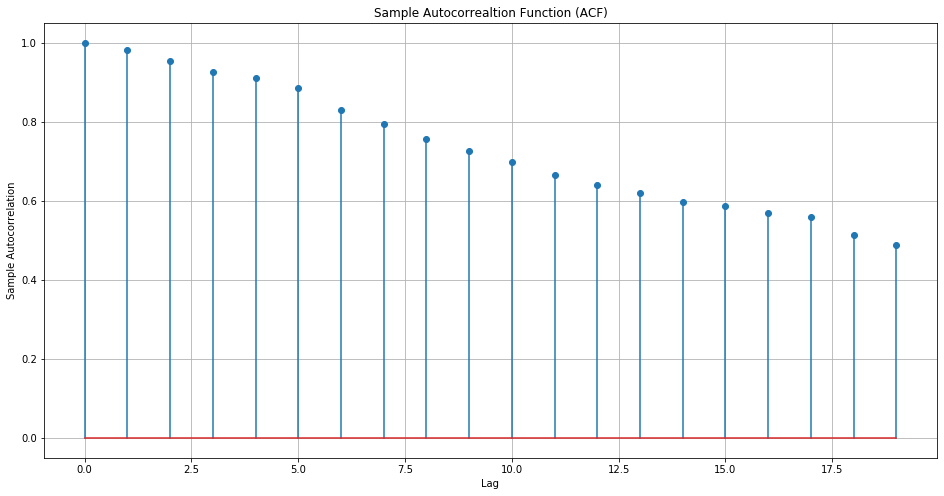

In [8]:
h = 20 # Number of lags
lags = range(h)
sa = np.zeros((h))
for k in range(len(lags)):
    sa[k] = sac(x, k)
plt.figure()
markerline, stemlines, baseline = plt.stem(lags, sa)
plt.grid()
plt.title('Sample Autocorrealtion Function (ACF)')
plt.ylabel('Sample Autocorrelation')
plt.xlabel('Lag')

In [9]:
h, pV, Q, cV = lbqtest(x, range(1, 20), alpha=0.1)
print ('lag   p-value          Q    c-value   rejectH0')
for i in range(len(h)):
    print ("%-2d %10.3f %10.3f %10.3f      %s" % (i+1, pV[i], Q[i], cV[i], str(h[i])))

lag   p-value          Q    c-value   rejectH0
1       0.000    199.739      2.706      True
2       0.000    388.964      4.605      True
3       0.000    567.711      6.251      True
4       0.000    741.601      7.779      True
5       0.000    907.366      9.236      True
6       0.000   1053.705     10.645      True
7       0.000   1188.288     12.017      True
8       0.000   1310.915     13.362      True
9       0.000   1424.529     14.684      True
10      0.000   1529.919     15.987      True
11      0.000   1626.280     17.275      True
12      0.000   1716.033     18.549      True
13      0.000   1800.555     19.812      True
14      0.000   1879.646     21.064      True
15      0.000   1956.204     22.307      True
16      0.000   2028.557     23.542      True
17      0.000   2098.602     24.769      True
18      0.000   2158.113     25.989      True
19      0.000   2212.260     27.204      True
